<a href="https://colab.research.google.com/github/LuisMig-code/KNN-Tutorial/blob/main/KNN_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN - K Nearest Neighbor
## KNeighborsClassifier

No artigo de hoje iremos debater sobre o KNN (algo como *K Vizinhos mais próximos*), aqui iremos **analisar seu funcionamento** em um exmplo prático! Aqui iremos usar o **KNeighborsClassifier** para fazer classificações em um projeto de *Data Science* do Zero. 

<img src="https://images.pexels.com/photos/164338/pexels-photo-164338.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500" width=600>

## Como funciona?

Para entendermos o **KNN** temos de ter noção um ***conceito de vizinhança***.

Em tese , o que entendemos por vizinhança é um aglomerado de casas/pessoas que moram em determinada rua próximo a nossa casa, em senso comum é isso que entendesse.

Em Matemática/Física o conceito de vizinhança trata-se de uma **região que faz fronteira ou rodeia um sistema**. Sendo que o termo "região" pode se referir a um **conjunto de dados com características comuns**

*Esse conceito é importante quando falamos agrupamentos em dados não supervisionados*

Imaginando essa ideia , podemos gerar algoritmos (tanto de classificação quanto de regressão) que agrupem nossos dados mediante "*o quão próximos eles são*". **A ideia do KNN , no geral , é criar vizinhanças a partir dos nossos dados**, repondendo perguntas como:

- **A amostra X tem características em comum com a amostra Y ?**
- **O quão diferentes a amostra X e Y são ?**
- **O que falta em X para ser próximo a Y ?**

## Funcionamento prático:

Agora que temos a noção teórica de como ele funciona , chegou a hora de ver ele funcionando de fato! 

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/03/knn3-768x694.png" width=350>

Vamos começar com um exercício de imaginação! Imaginemos que temos um conjunto de dados dividido em duas classes (quadrados e triângulos) . A partir de uma determinado amostra temos de definir qual a classificação dela. **Como o KNClassifier faria isso?**

- **Vamos tentar aplicar o conceito de vizinhança:**

*Será que esta nossa amostra é mais próxima a quadrado ou a triângulo?*

Basta usarmos as features(variáveis explicativas) que temos em nosso conjunto e notar as semelhanças e padrões nas labels e em nossa amostra. Normnalmente usa-se gráficos e funções lineares para encontrar esses padrões. 

- **Feito isso chegou ahora de definir o quão grande será nossa vizinhança:**

Vamos determinar um **número K de vizinhos** que queremos para nossa vizinhança. Iremos começar com 3! 

Com esse número veremos os **3 vizinhos** (*amostras mais semelhantes*) que temos da nossa amostra de testagem. No caso da imagem , definido o número de 3 , nota-se que existem **2 amostras classificadas como triângulo e 1 classificada como quadrado** .

Como o número de labels "triângulo" é superior aos "quadrados" , dizemos que nossa amostra de testagem será classificado como triângulo , **visto que é o que mais aparece.**

- **Mas e para mais vizinhos?**

Vimos que para 3 vizinhos temos um determinado resultado. O que acontece se usarmos agora *5 vizinhos*?

Podemos ver que **quando aumentamos o número de vizinhos aumenta as possíveis classificações** e para esta nova situação temos 3 amostras classificadas como "quadrado" e 2 como "triângulos"

**Portanto , para esta situação teremos que a amostra de testagem será agora quadrado , dado que é a que mais aparece!** 

Outro exemplo gráfico:

<img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" width=600>

## Quando e Por que utilizar o KNN (no geral):

**Por que ?**

Além de ser um bom algoritmo (para as distintas utilizades) , com resultados bons , **ele é também muito leve** , não sendo tão caro no quesito de processamento e bem **facil de se entender**.

**Quando?**

O KNN é muito bom quando se trata de dados numéricos em suas variáveis explicativas 

## Aplicação em um projeto prático:

<img src="https://image.freepik.com/free-vector/scientists-studying-neural-connections-programmers-writing-codes-machine-brain_74855-14157.jpg" width=500>

Agora que já entendemos o funcionamento geral do KNN , chegou a hora de aplicá-lo na vida real. Para este caso usarei o KNeighborsClassifier,um classificador baseado no conceito de KNN.

Para além dele existem **métricas de Regressões Linear** (*KNeighborsRegressor*) e usos em **Aprendizado não supervisionado** (*KMeans*)

Vamos começar importando as bibliotecas usadas no projeto:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

**Para nosso estudo vou me abster de explicar cada ação , estou imaginando que você já saiba o básico em Machine Learning e algumas ações** 

In [ ]:
# lendo nossos conjunto de dados:
path_test = "https://raw.githubusercontent.com/LuisMig-code/KNN-Tutorial/main/ESRB/test_esrb.csv?raw=true"
path_treino = "https://raw.githubusercontent.com/LuisMig-code/KNN-Tutorial/main/ESRB/Video_games_esrb_rating.csv?raw=true"

treino = pd.read_csv(path_treino)
teste = pd.read_csv(path_test)

In [ ]:
# vamos visualizar as 5 primeiras entradas do Dataset de treino:
treino.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T


In [ ]:
# checando se temos dados nulos para o conjunto de treino:
treino.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [ ]:
# checando se temos dados nulos para o conjunto de teste:
teste.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

É importante que saibamos a proporção da nossa variável alvo (aquela que queremos fazer a predição) , ou seja , q quantidade que temos dela nos dados de treino e nos dados de teste:

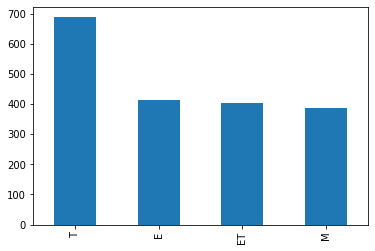

In [ ]:
# para os dados de treino:
treino.esrb_rating.value_counts().plot(kind="bar")

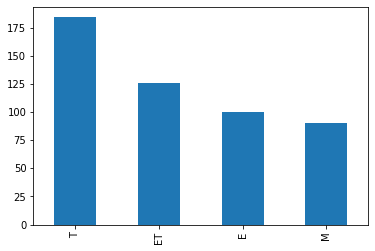

In [ ]:
# para os dados de teste:
teste.esrb_rating.value_counts().plot(kind="bar")

Agrupando os dados em dados de **X(features usadas para fazer as predições)** e **y(variável a ser predita)**.

In [ ]:
X_treino = treino.drop(["title","esrb_rating"] , axis=1)
y_treino = treino["esrb_rating"]
X_teste =  teste.drop(["title","esrb_rating"] , axis=1)
y_teste = teste["esrb_rating"]

Agora é a hora de criar o modelo:

In [ ]:
# instanciando o modelo:
modelo = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# "treinando o modelo":
modelo.fit(X_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# fazendo predições com o modelo criado:
predicoes = modelo.predict(X_teste)

In [ ]:
# mediando a precisão do modelo:
acuracia = accuracy_score(y_teste , predicoes)

print("Acurácia : {}".format(round(acuracia*100,4)))
print(classification_report(y_teste , predicoes))

Acurácia : 80.8
              precision    recall  f1-score   support

           E       0.80      0.98      0.88       100
          ET       0.81      0.79      0.80       126
           M       0.93      0.69      0.79        90
           T       0.77      0.79      0.78       184

    accuracy                           0.81       500
   macro avg       0.83      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



De maneira geral tivemos um bom resultado , com excessão da classificação "T" obtivemos precisões relativamente boas.

Vamos usar o GridSearch para saber qual o melhor número de vizinhos:

In [ ]:
k_list = list(range(1,61))

k_values = dict(n_neighbors=k_list)

In [ ]:
grid = GridSearchCV(modelo , k_values, cv=6, scoring='accuracy')

In [ ]:
grid.fit(pd.concat([X_treino,X_teste]) , pd.concat([y_treino,y_teste]))

GridSearchCV(cv=6, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print("Com os parâmetro: {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Com os parâmetro: {'n_neighbors': 13} com o valor 0.809203216374269 de acurácia


No quesito de acurácia , o valor de N vizinhos que melhor se saiu (para a acurácia) é o 13. Vamos verificar como foi o resultado:

In [ ]:
modelo = KNeighborsClassifier(n_neighbors=13)

In [ ]:
modelo.fit(X_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
predicoes = modelo.predict(X_teste)

In [ ]:
acuracia = accuracy_score(y_teste , predicoes)

print("Acurácia : {}".format(round(acuracia*100,4)))
print(classification_report(y_teste , predicoes))

Acurácia : 81.8
              precision    recall  f1-score   support

           E       0.84      0.97      0.90       100
          ET       0.78      0.85      0.81       126
           M       0.92      0.67      0.77        90
           T       0.80      0.79      0.79       184

    accuracy                           0.82       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



Podemos perceber que o resultado do n_vizinhos = 13 foi melhor para a acurácia , mas em âmbito geral , ele diminuiu a precisão da label "*ET*" e aumenta a "*T*"

A fim de verificar se de fato temos esse nível de acurácia , vamos usar o KFold para assegurar nosso resultado

In [ ]:
cv = StratifiedKFold(n_splits = 20 , shuffle=True)
modelo = KNeighborsClassifier(n_neighbors = 13)
results = cross_validate(modelo, X_treino, y_treino, cv = cv, return_train_score=False)

In [ ]:
np.mean(results["test_score"])

0.8115621500559911